In [48]:
import numpy as np
import sympy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data=pd.read_csv('C:\\Users\\Utsav\\Desktop\\pulsar_prediction\\pulsar_stars.csv', sep=',',header=0)


pulsarData=data.values
pulsarData=np.array(pulsarData)

In [49]:
#split the data

train, test = train_test_split(data, test_size=0.2)
pulsar=np.array(train)
train=np.array(train)
test=np.array(test)

print(len(test))
print(len(train))
#print(train)

3580
14318


In [50]:
#copy labels of test & train data elsewhere
#replace all test and train labels by 1 (for intercept term)


y_train=np.zeros(len(train))
y_test=np.zeros(len(test))
for i in range(len(test)):
    y_test[i]=test[i][8]
    test[i][8]=1

for i in range(len(train)):
    y_train[i]=train[i][8]
    train[i][8]=1
    

In [51]:
%%time
#logistic regression using sklearn
from sklearn.linear_model import LogisticRegression
# from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(train, y_train)

y_pred_prob = logreg.predict_proba(test)

# y_pred = logreg.predict(test)
y_pred = np.zeros(len(y_pred_prob))

print(len(y_pred_prob))
print(y_pred_prob[2500][1])
print("################")


3580
0.001196852554975546
################
Wall time: 207 ms


In [52]:
threshold = [0.1, 0.2, 0.3, 0.4, 0.5]
threshold = np.array(threshold)

scr = np.zeros(5)

In [53]:
for i in threshold:
    for j in range(len(y_pred_prob)):
        if(y_pred_prob[j][1] >= i):
            y_pred[j] = 1
        else:
            y_pred[j] = 0
            
    
    score=0
    for k in range(len(test)):
        if y_pred[k]==y_test[k]:
            score=score+1
    score=score*100/len(test)
    scr[int(10*i)-1] = score

            
    

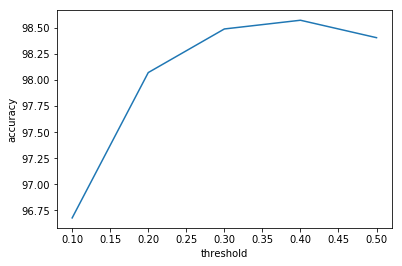

In [54]:
import matplotlib.pyplot as plt
plt.plot(threshold, scr)
plt.ylabel('accuracy')
plt.xlabel('threshold')
plt.show()

We get maximum accuarcy if we set threshold to 0.3 instead of 0.5

In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob[:,1])

0.9823780636269884